<h3 style="color:green">IMPORT LIBRARIES</h3>

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error


<h3 style="color:green">IMPORT DATASET</h3>

In [2]:
flight=pd.read_excel("C:/Users/HP/Downloads/Flight .xlsx")
flight.head(5)

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8,On,L,5
1,Kevin,kevin,23.0,16.0,B,U,8,On,L,5
2,Kevin,RR,NaN,18.0,A,L,10,On,R,6
3,Priya,Nithya,27.0,20.0,A,U,10,On,R,4
4,Priya,Priya,29.5,17.5,B,U,5,Off,R,8


<h3 style="color:green">DATA CLEANING AND DATA VISUALISATION</h3>

In [3]:
flight.shape

(88, 10)

In [4]:
flight.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

<h3 style="color:green">LENGTH</h3>

In [5]:
flight.Length.describe()

count    71.000000
mean     26.708451
std      11.920268
min       0.000000
25%      22.500000
50%      28.500000
75%      29.500000
max      98.000000
Name: Length, dtype: float64

In [6]:
flight.Length.fillna(flight.Length.mean(),inplace=True)

In [7]:
Q1=flight.Length.quantile(0.25)
Q3=flight.Length.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)

24.5 29.5 5.0 37.0 17.0


In [8]:
flight.Length[flight.Length>UE]=UE
flight.Length[flight.Length<LE]=LE

C:\Users\HP\AppData\Local\Temp/ipykernel_3300/3988765081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight.Length[flight.Length>UE]=UE
C:\Users\HP\AppData\Local\Temp/ipykernel_3300/3988765081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight.Length[flight.Length<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x25d5409d5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x25d5409dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d5409d160>],
 'medians': [<matplotlib.lines.Line2D at 0x25d540aa370>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d540aa700>],
 'means': []}

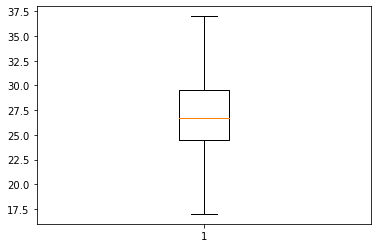

In [9]:
plt.boxplot(flight.Length)

<AxesSubplot:>

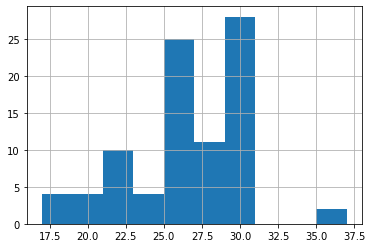

In [10]:
flight.Length.hist()

<h3 style="color:green">BREADTH</h3>

In [11]:
flight.Breadth.describe()

count    88.000000
mean     18.500000
std       1.339068
min      16.000000
25%      17.500000
50%      18.500000
75%      20.000000
max      20.500000
Name: Breadth, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x25d548e79a0>,
 'caps': [<matplotlib.lines.Line2D at 0x25d548f3100>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d548e7610>],
 'medians': [<matplotlib.lines.Line2D at 0x25d548f3820>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d548f3bb0>],
 'means': []}

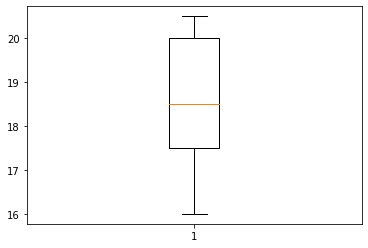

In [12]:
plt.boxplot(flight.Breadth)

<AxesSubplot:>

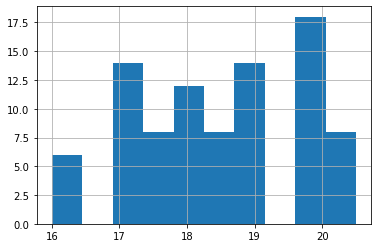

In [13]:
flight.Breadth.hist()

<h3 style="color:green">PAPER QUALITY</h3>

In [14]:
flight.PaperQuality.describe()

count     80
unique     2
top        B
freq      47
Name: PaperQuality, dtype: object

In [15]:
flight.PaperQuality.value_counts()

B    47
A    33
Name: PaperQuality, dtype: int64

In [16]:
flight.PaperQuality.fillna("others",inplace=True)

<AxesSubplot:xlabel='PaperQuality', ylabel='count'>

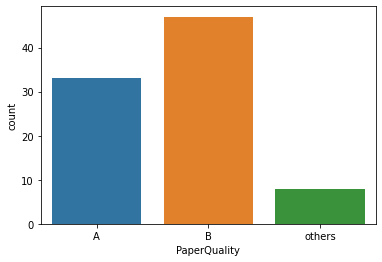

In [17]:
sns.countplot(x="PaperQuality",data=flight)

<h3 style="color:green">ANGLE</h3>

In [18]:
flight.Angle.describe()

count     84
unique     2
top        U
freq      62
Name: Angle, dtype: object

In [19]:
flight.Angle.value_counts()

U    62
L    22
Name: Angle, dtype: int64

In [20]:
flight.Angle.fillna("U",inplace=True)

<AxesSubplot:xlabel='Angle', ylabel='count'>

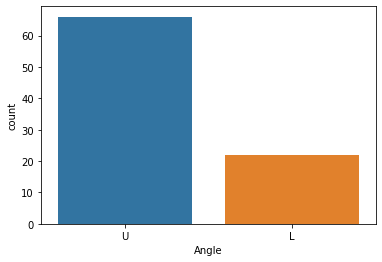

In [21]:
sns.countplot(x="Angle",data=flight)

<h3 style="color:green">FOLDINGS</h2>

In [22]:
flight.Foldings.describe()

count    88.000000
mean      8.136364
std       1.736570
min       5.000000
25%       8.000000
50%       8.000000
75%      10.000000
max      10.000000
Name: Foldings, dtype: float64

In [23]:
flight.Foldings.value_counts()

8     42
10    30
5     16
Name: Foldings, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Foldings', ylabel='count'>

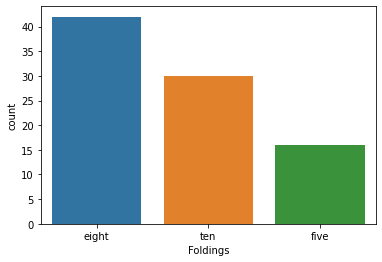

In [24]:
flight.Foldings.replace([5,8,10],['five','eight','ten'],inplace=True)
sns.countplot(flight.Foldings)

<h3 style="color:green">DOMINANT HAND</h2>

In [25]:
flight.Dominanthand.describe()

count     88
unique     2
top        R
freq      70
Name: Dominanthand, dtype: object

In [26]:
flight.Dominanthand.value_counts()

R    70
L    18
Name: Dominanthand, dtype: int64

<AxesSubplot:xlabel='Dominanthand', ylabel='count'>

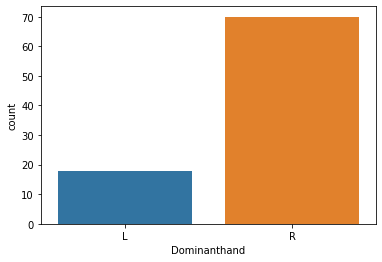

In [27]:
sns.countplot(x="Dominanthand",data=flight)

In [28]:
flight.drop('Item_Identifier',axis=1,inplace=True)

In [29]:
flight.columns

Index(['Person', 'Length', 'Breadth', 'PaperQuality', 'Angle', 'Foldings',
       'Windspeed ', 'Dominanthand', 'Distance'],
      dtype='object')

<h2 style="color:green">HYPOTHESIS TESTING</h2>

In [30]:
per1=flight.Distance[flight.Angle=="U"]
per2=flight.Distance[flight.Angle=="L"]
stats.f_oneway(per1,per2)

F_onewayResult(statistic=0.01536537430766485, pvalue=0.9016384670871649)

<h3 style="color:green">Creating Dummies</h3>

In [31]:
dummy=pd.get_dummies(flight)
dummy.columns

Index(['Length', 'Breadth', 'Distance', 'Person_Giri', 'Person_Kevin',
       'Person_Priya', 'Person_Shabana', 'PaperQuality_A', 'PaperQuality_B',
       'PaperQuality_others', 'Angle_L', 'Angle_U', 'Foldings_eight',
       'Foldings_five', 'Foldings_ten', 'Windspeed _Off', 'Windspeed _On',
       'Dominanthand_L', 'Dominanthand_R'],
      dtype='object')

In [32]:
dummy.shape

(88, 19)

<h3 style="color:green">Scaling</h3>

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(dummy)
scaled_data=scaler.transform(dummy)
final= pd.DataFrame(scaled_data)

In [36]:
dummy.Distance

0     5
1     5
2     6
3     4
4     8
     ..
83    7
84    5
85    4
86    5
87    7
Name: Distance, Length: 88, dtype: int64

In [37]:
final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.600000,0.888889,0.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.300000,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.485423,0.444444,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.500000,0.888889,0.3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.625000,0.333333,0.7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


<h3 style="color:green">Separate X and Y</h3>

In [39]:
y=dummy.Distance
x=dummy.drop("Distance",axis=1)

In [40]:
y.shape

(88,)

In [41]:
x.shape

(88, 18)

<h3 style="color:green">Split Train and Test</h3>

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

<h2> PERFORMING REGRESSION </h2>

<h3 style="color:green">LinearRegression</h3>

In [45]:
model=LinearRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))

Train Score = 0.17950652962843983
Test Score = -0.16501745027819914


In [46]:
predicts=model.predict(x_test)

In [47]:
mean_squared_error(y_test,predicts,squared=False)

2.073763852030866

<h3 style="color:green">DecisionTree Regressor</h3>

In [48]:
model1=DecisionTreeRegressor().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))
predict_y=model1.predict(x_test)

Train Score = 0.3580246913580246
Test Score = -0.765585284280937


In [49]:
predicts=model1.predict(x_test)

In [50]:
mean_squared_error(y_test,predicts,squared=False)

2.552921347673564

<h3 style="color:green">Random Forest</h3>

In [51]:
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [52]:
model2.score(x_train,y_train)

0.3185553697530049

In [53]:
model2.score(x_test,y_test)

-0.5269640298479055

In [54]:
predicts=model2.predict(x_test)

In [55]:
mean_squared_error(y_test,predicts,squared=False)

2.3741463571132506

<h3 style="color:green">GradientBootingRegressor</h3>

In [56]:
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [57]:
model3.score(x_train,y_train)

0.3510351039596519

In [58]:
model3.score(x_test,y_test)

-0.8035773716909667

In [59]:
predicts=model3.predict(x_test)

In [60]:
mean_squared_error(y_test,predicts,squared=False)

2.580242198737009

In [62]:
result=model3.predict(x_test)

In [63]:
print(result)

[6.67652074 7.2529476  4.89108579 4.48516689 7.57825114 5.53198754
 6.14123561 5.49258174 7.57825114 4.89108579 6.82133173 3.49172866
 5.07584446 5.07584446 9.43713537 6.14123561 7.57825114 6.39263781]


<h3 style="color:green">Adaboost Classifier</h3>

In [64]:
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [65]:
regress.score(x_train,y_train)

0.20562468919568444

In [66]:
regress.score(x_test,y_test)

-0.4839266940290661

In [67]:
predicts=regress.predict(x_test)

In [68]:
mean_squared_error(y_test,predicts,squared=False)

2.3404496811634106